In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
letters, years = [], []
fn = "ltcs180_textbook/03-vector-space-model/data/chain-letters.csv"

with open(fn) as f:
    reader = csv.DictReader(f)
    for row in reader:
        letters.append(row["letter"])
        years.append(int(row["year"]))

## Moderate Exercises
1. The length of the chain letters has changed considerably over the years.
Compute the average length of letters from before 1950, and compare that
to the average length of letters after 1950. (Hint: convert the list of years
into a NumPy array, and use boolean indexing to slice the document-term
matrix.)

In [3]:
# np_letters = np.array(letters)
np_years = np.array(years)

before_1950 = np.array(letters)[np_years < 1950]
after_1950 = np.array(letters)[np_years >= 1950]

avg_length_before_1950 = np.mean([len(letter) for letter in before_1950])
avg_length_after_1950 = np.mean([len(letter) for letter in after_1950])

print("Average length of letters before 1950:", avg_length_before_1950)
print("Average length of letters after 1950:", avg_length_after_1950)

Average length of letters before 1950: 687.567944250871
Average length of letters after 1950: 1914.119850187266



2. Make a scatter plot to visualize the change in letter length over time. Add
a label to the X and Y axis, and adjust the opacity of the data points for
better visibility. Around what year do the letters suddenly become much
longer?


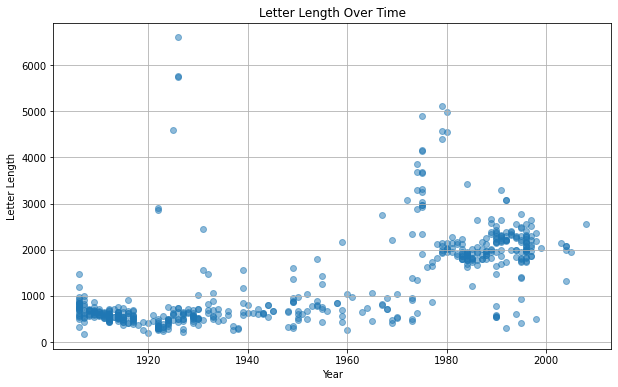

In [4]:
letter_lengths = np.array([len(letter) for letter in letters])

plt.figure(figsize=(10, 6))
plt.scatter(years, letter_lengths, alpha=0.5)
plt.title("Letter Length Over Time")
plt.xlabel("Year")
plt.ylabel("Letter Length")
plt.grid(True)
plt.show()

3. Not only the length of the letters has changed, but also the contents
of the letters. Early letters in the corpus still have strong religious Exploring Texts Using the Vector Space Model • 113
undertones,2 while newer examples put greater emphasis on superstitious
beliefs. VanArsdale (2019) points to an interesting development of the
postscript “It works!” The first attestation of this phrase is in 1979, but
in a few years’ time, all succeeding letters end with this statement. Extract
and print the summed frequency of the words Jesus and works in letters
written before and written after 1950

In [5]:
%pip install nltk;

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import nltk
import nltk.tokenize
import re
import collections

In [7]:
nltk.download('punkt', quiet=True)

PUNCT_RE = re.compile(r'[^\w\s]+$')

def is_punct(string):
    return PUNCT_RE.match(string) is not None

def preprocess_text(text, language, lowercase=True):
    if lowercase:
        text = text.lower()
    tokens = nltk.tokenize.word_tokenize(text, language=language)
    tokens = [token for token in tokens if not is_punct(token)]
    return tokens

def create_vocab(corpus):
    vocabulary = collections.Counter()
    for l in corpus:
        vocabulary.update(preprocess_text(l, 'english'))
    return vocabulary

In [8]:
before_vocab = create_vocab(before_1950)
after_vocab = create_vocab(after_1950)

In [9]:
print(f"Before 1950 - Jesus: {before_vocab['jesus']}, Works: {before_vocab['works']}")
print(f"After 1950 - Jesus: {after_vocab['jesus']}, Works: {after_vocab['works']}")

Before 1950 - Jesus: 167, Works: 1
After 1950 - Jesus: 4, Works: 145


## Challenging Exercises
1. Compute the cosine distance between the oldest and the youngest letter in the corpus. Subsequently, compute the distance between two of the oldest letters (any two letters from 1906 will do). Finally, compute the distance between the youngest two letters. Describe your results.

In [10]:
import nltk 
import nltk.tokenize
import re
import numpy as np

PUNCT_RE = re.compile(r'[^\w\s]+$')
nltk.download('punkt', quiet=True)

def is_punct(string):
    return PUNCT_RE.match(string) is not None

def preprocess_text(text, language, lowercase=True):
    if lowercase:
        text = text.lower()
    tokens = nltk.tokenize.word_tokenize(text, language=language)
    tokens = [token for token in tokens if not is_punct(token)]
    return tokens


def extract_vocabulary(tokenized_corpus,
    min_count=1,
    max_count=float('inf')):
    vocabulary = collections.Counter()
    for document in tokenized_corpus:
        vocabulary.update(document)
    vocabulary = {
        word for word, count in vocabulary.items()
        if count >= min_count and count <= max_count
    }
    return sorted(vocabulary)

def corpus2dtm(tokenized_corpus, vocabulary):
    document_term_matrix = []
    for document in tokenized_corpus:
        document_counts = collections.Counter(document)
        row = [document_counts[word] for word in vocabulary]
        document_term_matrix.append(row)
    return document_term_matrix

def vector_len(v):
    return np.sqrt(np.sum(v**2))

def cosine_distance(a, b):
    return 1 - np.dot(a, b) / (vector_len(a) * vector_len(b))


In [11]:
tokenized_corpus = [
    preprocess_text(document, 'french') for document in letters
]
vocabulary = extract_vocabulary(tokenized_corpus)

document_term_matrix = corpus2dtm(tokenized_corpus, vocabulary)
document_term_matrix = np.array(document_term_matrix)

In [12]:
oldest = cosine_distance(document_term_matrix[0], document_term_matrix[1])
youngest = cosine_distance(document_term_matrix[-1], document_term_matrix[-2])
oldest_v_youngest = cosine_distance(document_term_matrix[0], document_term_matrix[-1])

print(f"cosine distance between oldest and youngest letter: {oldest_v_youngest}")
print(f"cosine distance between oldest letters: {oldest}")
print(f"cosine distance between youngest letters: {youngest}")

cosine distance between oldest and youngest letter: 0.8181861849647094
cosine distance between oldest letters: 0.29480753768359047
cosine distance between youngest letters: 0.7472898127581867


2. Use SciPy’s pdist() function to compute the cosine distances between all letters in the corpus. Subsequently, transform the resulting condensed distance matrix into a regular square-form distance matrix. Compute the average distance between letters. Do the same for letters written before 1950, and compare their mean distance to letters written after 1950. Describe your results.

In [13]:
from scipy.spatial.distance import pdist, squareform
# compute cosine distance
cosine_distances = pdist(document_term_matrix, metric="cosine")
# transform into square-form distance matrix
distance_matrix = squareform(cosine_distances)
# compute average distance
average_distances = np.mean(distance_matrix)

# select years
before_1950 = np.array(years) < 1950
after_1950 = np.array(years) >= 1950

# calculate average distances
distances_before = distance_matrix[before_1950, :][:, before_1950]
average_before = np.mean(distances_before)
distances_after = distance_matrix[after_1950, :][:, after_1950]
average_after = np.mean(distances_after)

print(f"average distance between all letters: {average_distances}")
print(f"average distance between letters before 1950: {average_before}")
print(f"average distance between letters after 1950: {average_after}")


average distance between all letters: 0.5059311128570616
average distance between letters before 1950: 0.5125086352394902
average distance between letters after 1950: 0.3854772775059224


Letters after 1950 have a lower value for average distance, so they are more similar to one another than letters before 1950 or all of the letters.


3. The function pyplot.matshow() in Matplotlib takes a matrix or an array as argument and plots it as an image. Use this function to plot a square-form distance matrix for the entire letter collection. To enhance your visualization, add a color bar using the function pyplot.colorbar(), which provides a mapping between the colors and the cosine distances. Describe the resulting plot. How many clusters do you observe?

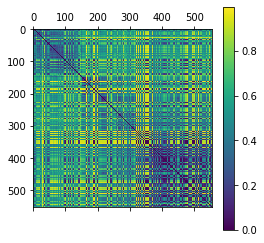

In [14]:
import matplotlib.pyplot as plt
plt.matshow(distance_matrix) 

plt.colorbar()
plt.show()

We see that there's a diagonal line of dark blue, which compares the letter to itself, thus having a distance of 0. The image is also mirrored across this line. We see that that there's a yellow line around 350: perhaps there's a couple letters that are very dissimilar to the rest of the corpus? There's also blue squares of clusters in the upper left and bottom right, showing that older letters between 0 and 100 and younger letters between 350 and 550 are more similar to one another. 